# Surrogate Construction for Genz Functions as a function of PC order

This notebook constructs a PC surrogate for Genz functions using galerkin projection (full and sparse quadrature) and regression. It also calculates the RMS error and gives the root mean square error between the surrogate and the actual function. Both the Genz function and PCE are defined on [-1,1].

In [1]:
# imports
import numpy as np
import math  
import matplotlib.pyplot as plt
import pandas as pd

import PyUQTk.pce as uqtkpce
import PyUQTk.PyPCE.pce_tools as pce_tools
from PyUQTk.utils.func import *
from surrogate_tools import *

PyMC is required for some of the MCMC postprocessing codes.
Will proceed without, but some convergence tests will not be available.


## Inputs

In [2]:
max_nord = 6        # Order of the PCE
#pc_type = "LU"      # Polynomial type
pc_alpha = 0.0      # Free parameter > -1 for Gamma-Laguerre and Beta-Jacobi PCs
pc_beta = 1.0       # Free parameter > -1 for Gamma-Laguerre and Beta-Jacobi PCs
nSam = 10000        # Number of random samples
ndim = 3            # Number of dimensions
model_genz= 'genz_osc'   # Choices are 'genz_osc', 'genz_exp', 'genz_cont','genz_gaus','genz_cpeak', 'genz_ppeak'
quad_type='None'      # full or sparse quadrature
method="bcs"

First, we define the range of orders that we will be looping through.

In [3]:
tot_ord=range(1, 1+max_nord)

## Surrogate Construction
We loop through different PC orders, obtaining the RMSE for each.

In [4]:
pc_type='LU'
errors1=[] # list to store errors
std=[]

# loop through different PC orders
for nord in tot_ord:
    RMSE_list=[]
    for i in range(10):
        f_actual, pce_evals=surrogate(method, nord, ndim, pc_type, pc_alpha, pc_beta, model_genz, nSam, quad_type)

        # Error
        MSE = np.square(np.subtract(f_actual,pce_evals)).mean()
        RMSE=math.sqrt(MSE)
        RMSE_list.append(RMSE)
    errors1.append(np.array(RMSE_list).mean())
    std.append(np.std(np.array(RMSE_list)))

Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iteration

In [5]:
pc_type='HG'
errors2=[] # list to store errors
std2=[]

# loop through different PC orders
for nord in tot_ord:
    RMSE_list=[]
    for i in range(10):
        f_actual, pce_evals=surrogate(method, nord, ndim, pc_type, pc_alpha, pc_beta, model_genz, nSam, quad_type)

        # Error
        MSE = np.square(np.subtract(f_actual,pce_evals)).mean()
        RMSE=math.sqrt(MSE)
        RMSE_list.append(RMSE)
    errors2.append(np.array(RMSE_list).mean())
    std2.append(np.std(np.array(RMSE_list)))

BCS algorithm converged, # iterations : 24 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
BCS algorithm converged, # iterations : 4 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iteration # 10
BCS algorithm converged, # iterations : 14 
Iteration # 0
Iterati

## Summary

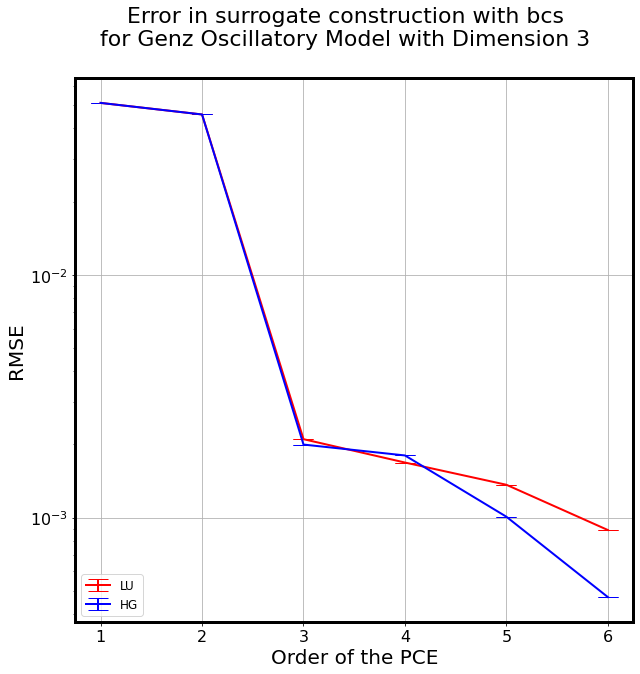

In [6]:
#Create figure
fig, ax = plt.subplots(figsize=(10,10))
#Plot Quadrature Data
plt.errorbar(tot_ord, errors1, color='r', yerr=std, xerr=None, linewidth=2, markersize=8, capsize=10, label="LU")
plt.errorbar(tot_ord, errors2, color='b', yerr=std, xerr=None, linewidth=2, markersize=8, capsize=10, label="HG")
#Label Axes
plt.xlabel("Order of the PCE",fontsize=20)
plt.ylabel("RMSE",fontsize=20)
#Create legend
plt.legend(loc='lower left')

#Model titles to be displayed
if model_genz=="genz_osc":
    model_title="Genz Oscillatory"
elif model_genz=="genz_gaus":
    model_title="Genz Gaussian"
elif model_genz=="genz_ppeak":
    model_title="Genz Product-Peak"
elif model_genz=="genz_cpeak":
    model_title="Genz Corner-Peak"
elif model_genz=="genz_exp":
    model_title="Genz Exponential"
else:
    model_title="Genz Continuous"

#Add title
fig.suptitle("Error in surrogate construction with %s\nfor %s Model with\
 Dimension %s"%(method, model_title, str(ndim)), fontsize=22)
#Make y scale logarithmic
plt.yscale('log')
#Change size of tick labels
plt.tick_params(axis='both', labelsize=16)

#Show figure
plt.show() 